In [1]:
import pandas as pd
import psycopg2
import config
import workdays
import datetime
import plotly
import plotly.express as px
import plotly.graph_objects as go
pd.options.mode.chained_assignment = None  # default='warn'
from matplotlib.ticker import FuncFormatter
holidays_br = workdays.load_holidays('BR')
holidays_b3 = workdays.load_holidays('B3')
from plotly_resampler import FigureResampler, EveryNthPoint, EfficientLTTB
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from functools import reduce
import numpy as np

In [2]:
db_conn_k11 = psycopg2.connect(host=config.DB_K11_HOST, dbname=config.DB_K11_NAME , user=config.DB_K11_USER, password=config.DB_K11_PASS)
query=f"SELECT ticker, spread_bps, spread_localccy, spread_usd, data_hora FROM public.adr_spread  where data_hora>'2022-05-24'"


df =pd.read_sql(query,db_conn_k11)
db_conn_k11.close()
df=df.drop_duplicates()
tickers = dict()


In [3]:
df['date'] =df['data_hora'].apply(lambda x: x.date())

In [4]:
week = df[df['date']>workdays.workday(datetime.date.today(), -7, holidays_b3)]

In [5]:
week.groupby(by='ticker').agg({'spread_bps':np.mean}).sort_values('spread_bps')

,spread_bps
ticker,
BRFS3,-1060.683934
CIEL3,-482.836000
ABEV3,-149.223732
GOLL4,-123.984185
PCAR3,-122.636442
BBDC3,-92.692303
BBSE3,-89.455674
ITUB4,-75.341609
SBSP3,-52.219567


In [6]:
papeis=['BRFS3','PCAR3','ABEV3','VALE3','SUZB3']
entrada = {
'ABEV3':-127.53627175215499,
'BRFS3':-117.56452607569001,
'PCAR3':-98.62502378144538,
    }


In [7]:
import numpy as np
import matplotlib.pyplot as plt

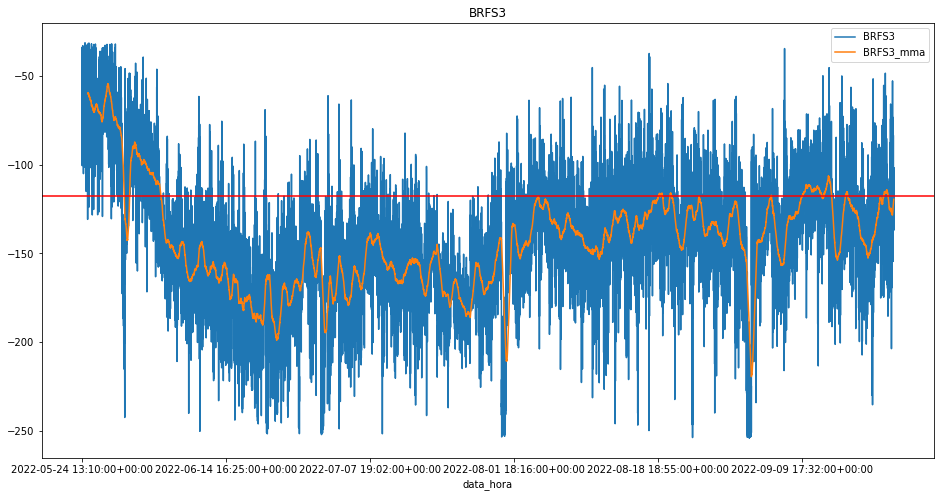

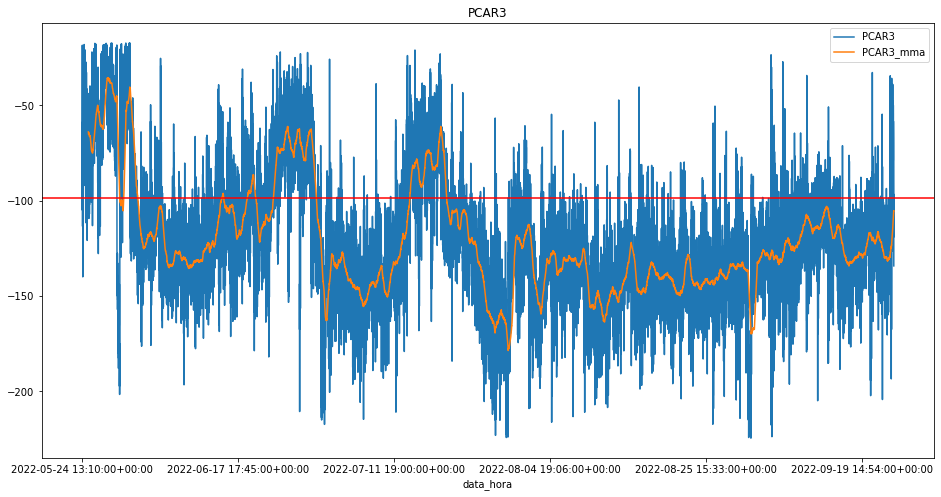

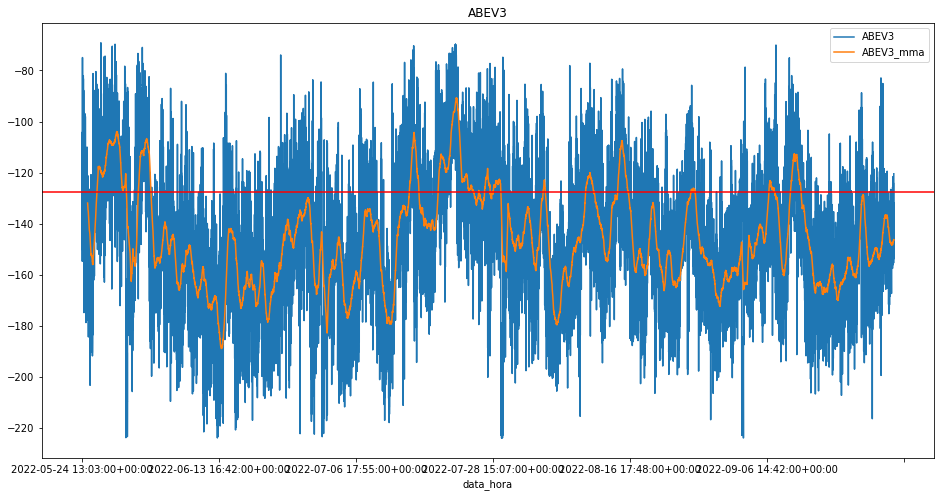

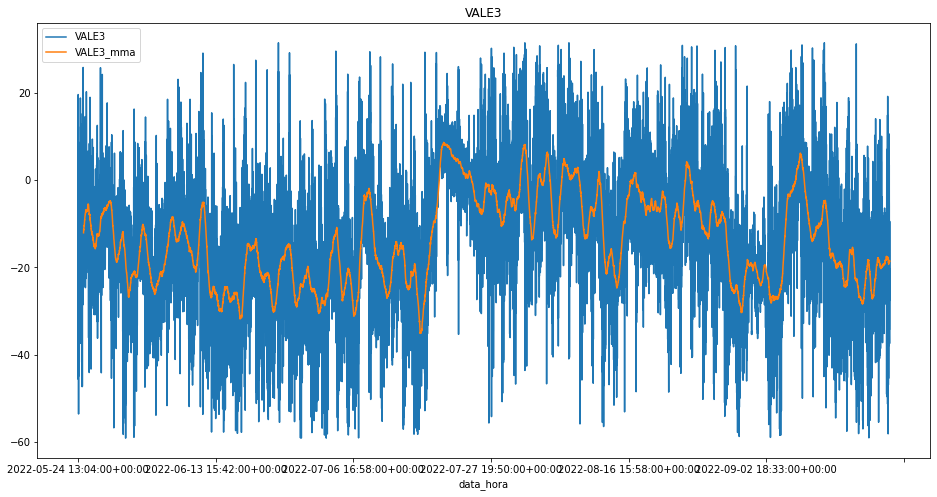

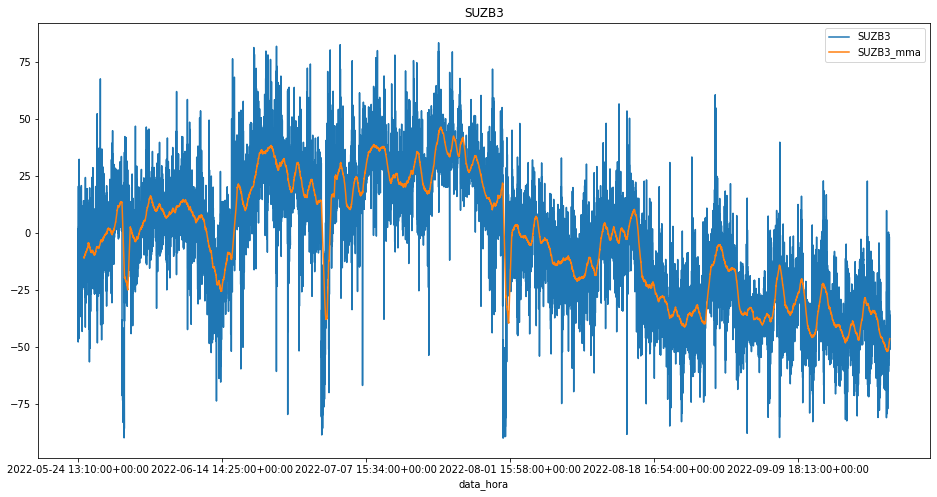

In [9]:
for i,t in enumerate(papeis):
    tickers.__setitem__(f"{t}",df[df['ticker']==f"{t}"].sort_values(by='data_hora',ascending=True).rename(columns={'spread_bps':f"{t}"}))
    tickers[t]['data_hora'] = tickers[t]['data_hora'].astype(str)
    tickers[t]=tickers[t][['data_hora',f"{t}"]].set_index('data_hora')
    tickers[t] = tickers[t][np.abs(tickers[t][t]-tickers[t][t].mean()) <= (3*tickers[t][t].std())].sort_values('data_hora').dropna()
    tickers[t] = tickers[t][np.abs(tickers[t][t]-tickers[t][t].mean()) <= (3*tickers[t][t].std())].sort_values('data_hora').dropna()
    tickers[t][f"{t}_mma"]=tickers[t][t].rolling(200).mean()
    mininimo = tickers[t][f"{t}_mma"].min()
    maximo = tickers[t][f"{t}_mma"].max()
    tickers[t].plot(kind='line',title=f"{t}",figsize=(16,8))
    try:
        plt.axhline(y=entrada[t], color='r', linestyle='-')
#         plt.axhline(y=entrada[t]-26, color='g', linestyle='-')
    except:
        pass
    if i==0:
              
        complete=tickers[t][[f"{t}_mma"]]
    else:
        complete = complete.merge(tickers[t][[f"{t}_mma"]],on='data_hora',how='left')

,BRFS3,BRFS3_mma
data_hora,,
2022-05-24 13:10:00+00:00,-45.090909,NaN
2022-05-24 13:15:00+00:00,-100.520314,NaN
2022-05-24 13:17:00+00:00,-54.359630,NaN
2022-05-24 13:21:00+00:00,-58.261056,NaN
2022-05-24 13:30:00+00:00,-39.396601,NaN
...,...,...
2022-09-02 19:46:00+00:00,-132.311955,-122.919585
2022-09-02 19:47:00+00:00,-143.635261,-123.134070
2022-09-02 19:48:00+00:00,-144.938547,-123.395429
